# Exploring role of AMPA and NMDA
In this notebook we will try to elucidate the role of AMPA and NMDA. In order to do so we will follow the next approach: first we will build a fully functional network that does sequence learning as it should, and characterise it. Then we will eiminate the different parts of the network bit by bit in order to see how this affects the recalling prospects.

Particular pieces that we should try removing are the following:
* Remove NMDA
* Remove AMPA
* Remove Bias
* Different recall times (100 ms vs 1s)
* Different inter-sequence intervals
* Remove adaptation. 
* Remove modular structure, only one hypercolumn.
* Play with the number of minicolumns

In [12]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

from network import Protocol, BCPNNModular, NetworkManager
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities

## General parameters

In [13]:
g_w_ampa = 2.0
g_w = 1.0 
g_a = 10.0
tau_a = 0.250

## Fully functional network

In [14]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNModular(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


success 0.0


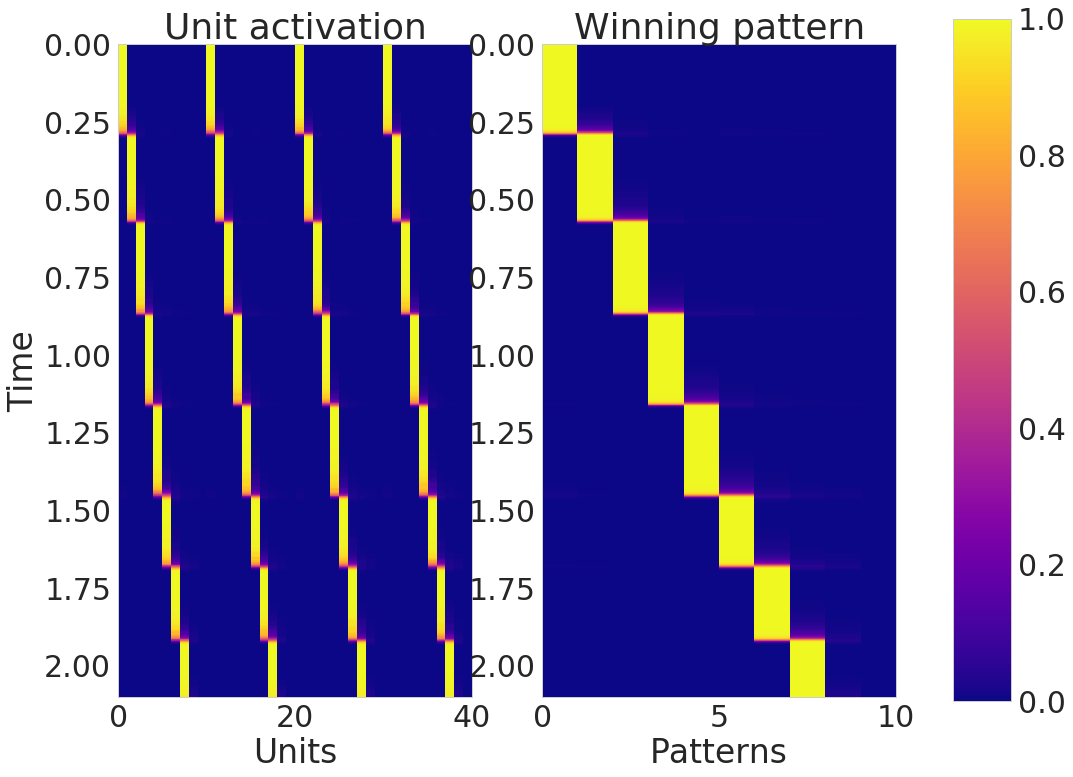

In [15]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

## Removing NMDA and AMPA
The first thing that we can do is to remove NMDA from the recall

success 0.0


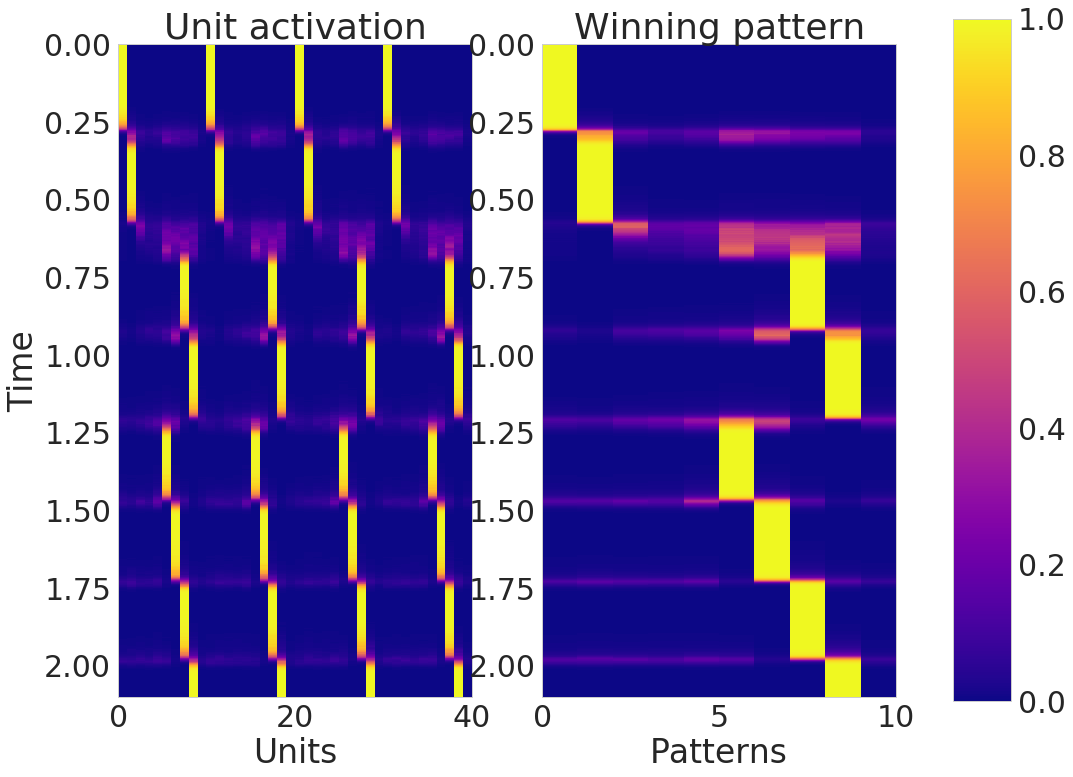

In [16]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1
manager.nn.g_w = 0.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

We note that this still works, it seems that there is some bias for the second unit that the network recover through the attractor dynamics. Let's see what happens if we remove AMPA as well.

success 0.0


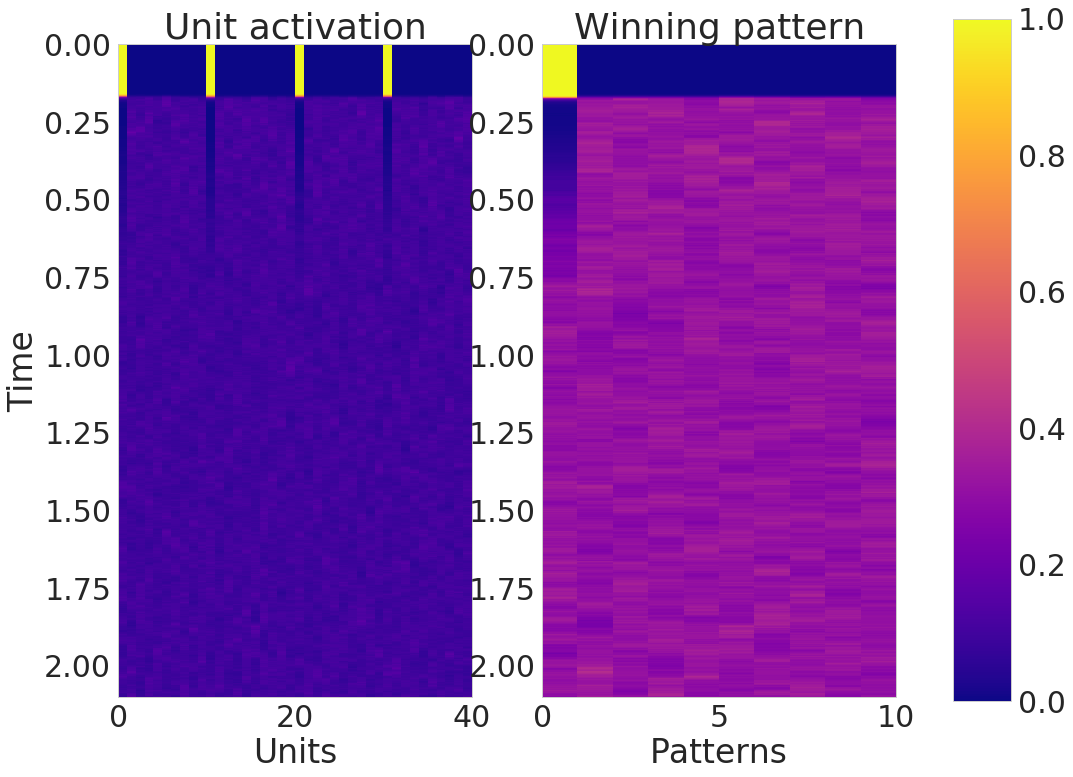

In [17]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1
manager.nn.g_w = 0.0
manager.nn.g_w_ampa = 0.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

The activity of the network goes as we expected. Let's see what happens if we only cut the AMPA.

success 0.0


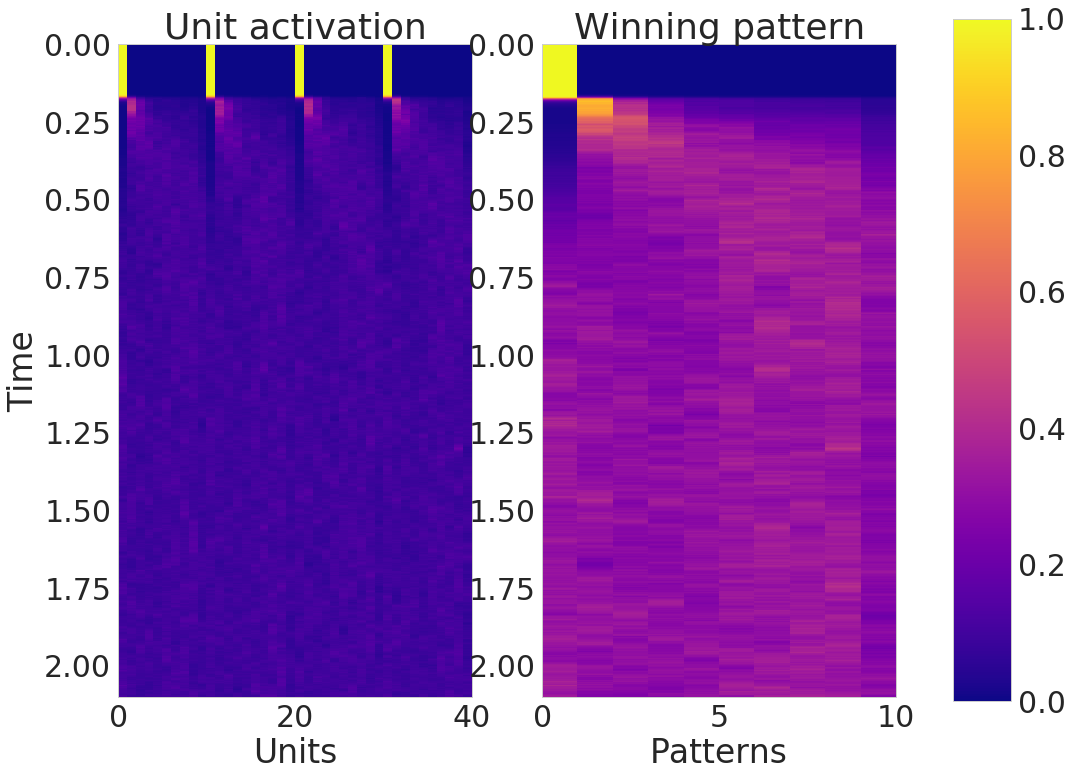

In [18]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1
manager.nn.g_w = 1.0
manager.nn.g_w_ampa = 0.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

NMDA seems no to work by itself. Let's just try to increase the NMDA gain to a very high number

success 100.0


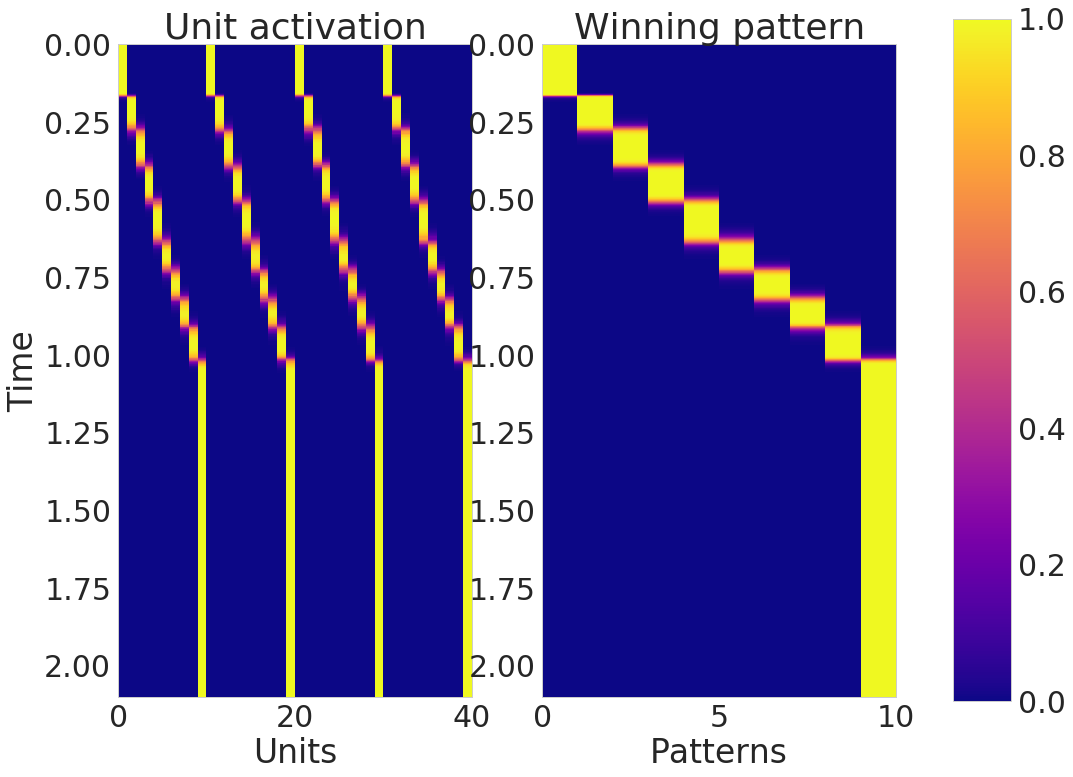

In [19]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1
manager.nn.g_w = 10.0
manager.nn.g_w_ampa = 0.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

This is sufficient to bind the patterns. This means that the NMDA does not play a role because is to weak. The problem is that I expected that cutting the NMDA will keep the attractors but not in the order, so the question is, what is keeping the sequence in order if not NMDA. AMPA does actually have a very short binding time constant (tau_z=0.005 ms) so we may try to see if this effect dissappears when the attractors are **do not come one immediately after the other**.

## The role of the inter-sequence time

In [20]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.050
epochs = 3

# Build the network
nn = BCPNNModular(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


success 0.0


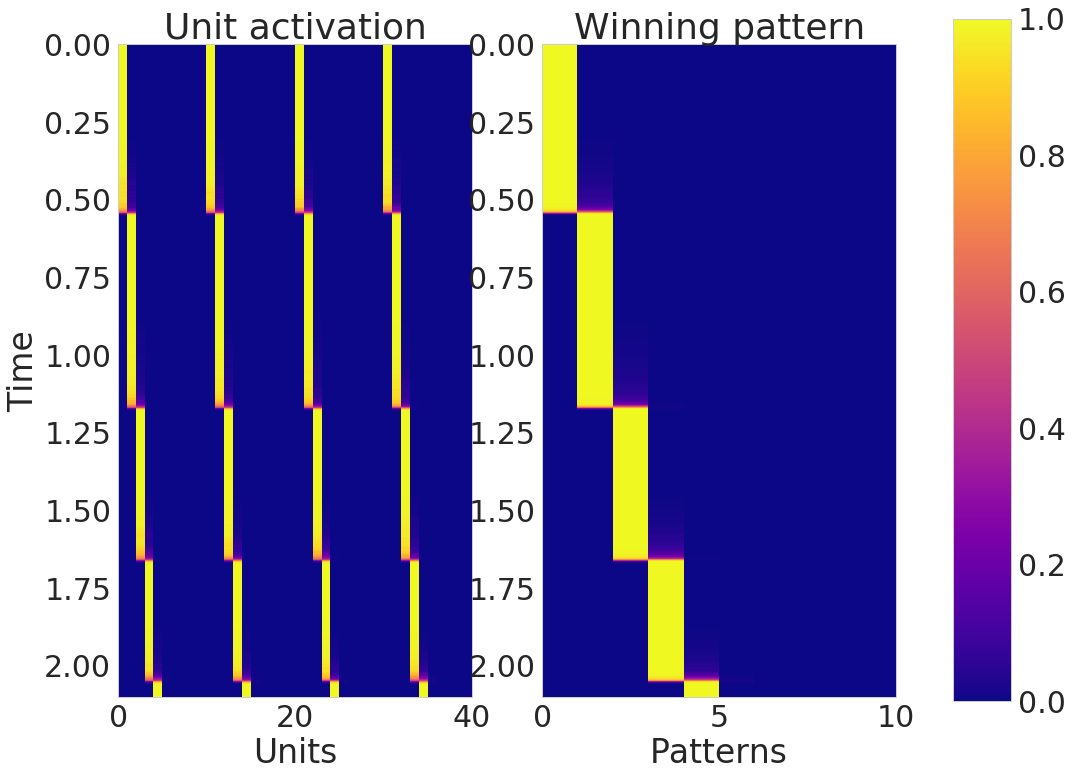

In [21]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

We appreciate that the recall time has become longer.

**Hypothesis**: The NMDA has become weaker and that is partially responsible for the transition. 

Now we run this without NMDA:

success 0.0


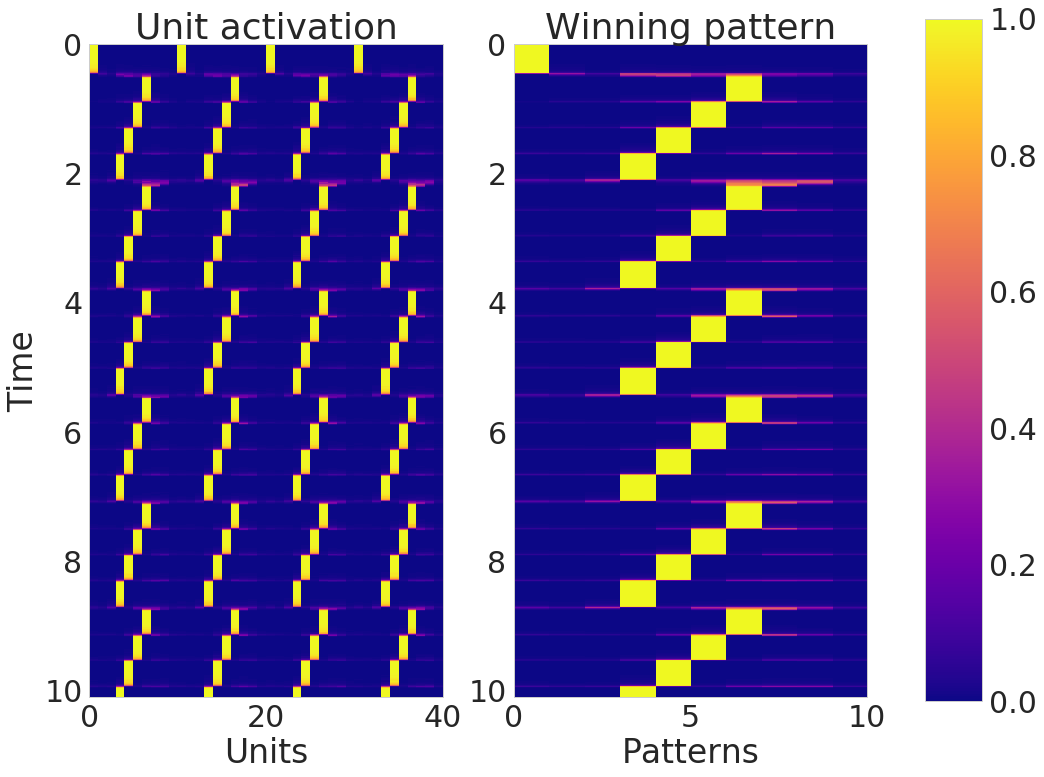

In [34]:
T_recall = 10.0
T_cue = 0.100
sequences = [patterns_indexes]
n = 1

manager.nn.g_w_ampa = g_w_ampa
manager.nn.g_w = 0.0

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

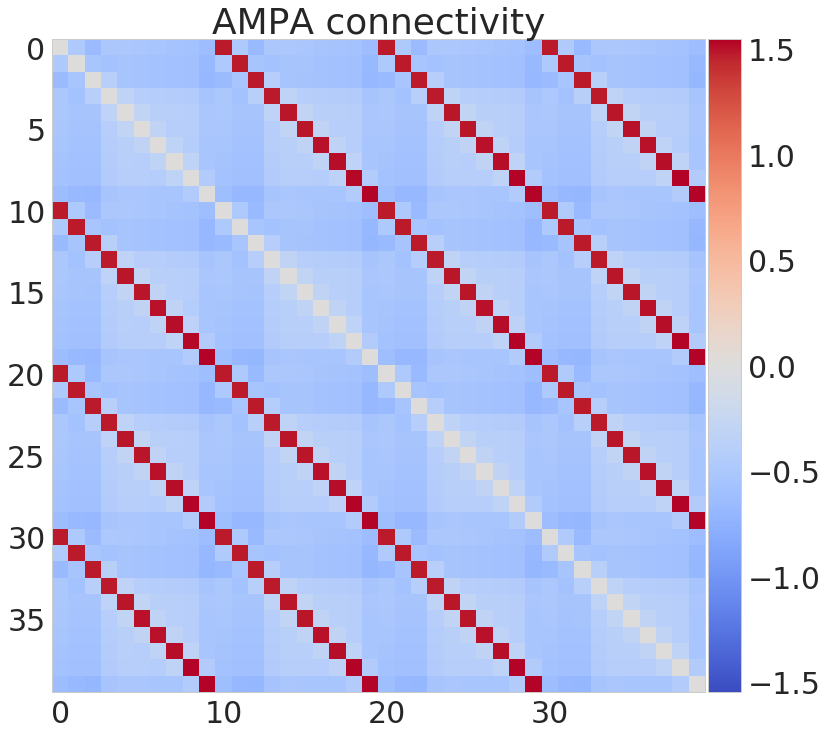

In [37]:
plot_weight_matrix(manager.nn, ampa=True, one_hypercolum=False)

## 